In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

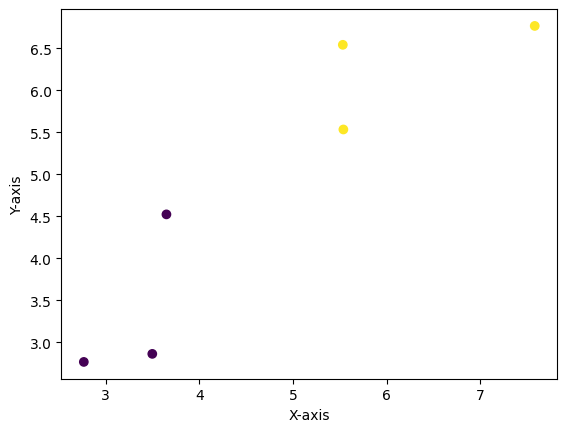

In [468]:
# Set a random seed for reproducibility
np.random.seed(42)

n_points = 3
# Class 1
class1_points = np.random.normal(loc=[3, 3], scale=[1, 1], size=(n_points, 2))

# Class 2
class2_points = np.random.normal(loc=[6, 6], scale=[1, 1], size=(n_points, 2))

# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])

# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([-1] * n_points + [1] * n_points)

# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [469]:
labels

array([-1, -1, -1,  1,  1,  1])

In [470]:
scaler = MinMaxScaler(feature_range=(-1,1))
all_points = scaler.fit_transform(all_points)

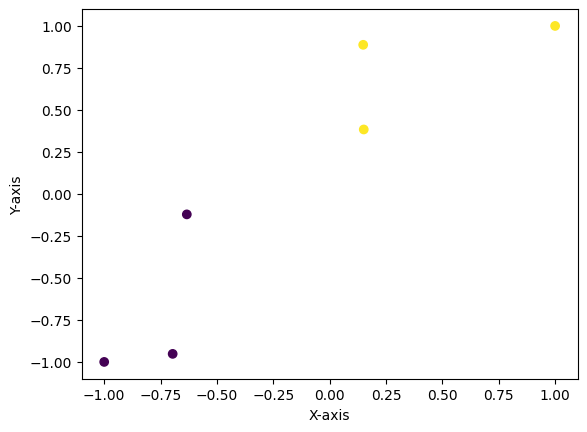

In [471]:
# all_points = all_points - all_points.mean(axis=0)
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

w_1.x + w_2.y = 0 -> y = - w_1.x / w_2

In [472]:
def line(W):
    x_start = -10
    x_end = 10
    return np.array([[x_start, (-W[1] * x_start  - W[0])/ W[2]], [x_end, (-W[1] * x_end  - W[0])/ W[2]]])

In [473]:
def plot_classifier(points, W):
    lines = line(W)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
    ax.plot(lines[:, 0], lines[:, 1], c='b')
    ax.plot([0, W[1]], [0, W[2]], c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

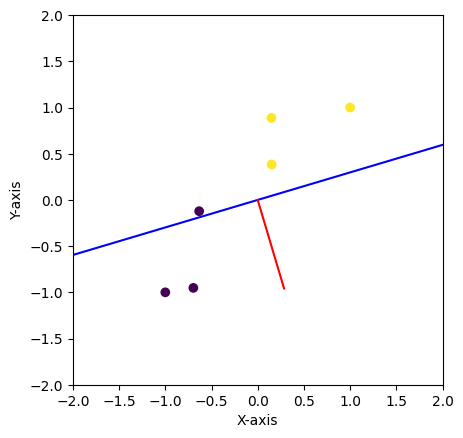

In [474]:
# np.random.seed(400)
W = -np.random.rand(3) + np.random.rand(3)
W[0] = 0
W = W / np.linalg.norm([W[0], W[1], W[2]])
plot_classifier(all_points, W)

In [475]:
W.shape

(3,)

In [476]:
all_points = np.concatenate([np.array([[1] * len(all_points)]).reshape(-1,1),all_points], axis=1)
all_points

array([[ 1.        , -0.6963175 , -0.9520825 ],
       [ 1.        , -0.63358619, -0.12176167],
       [ 1.        , -1.        , -1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.14875074,  0.88760682],
       [ 1.        ,  0.15126736,  0.38365993]])

In [477]:
y = labels

In [478]:
def predict(X, W):
    return np.sign(X.dot(W))

C:\Users\84866\AppData\Local\Temp\ipykernel_21288\3525715120.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(all_points[pos][:, 1], all_points[pos][:, 2], c='r', cmap='viridis')


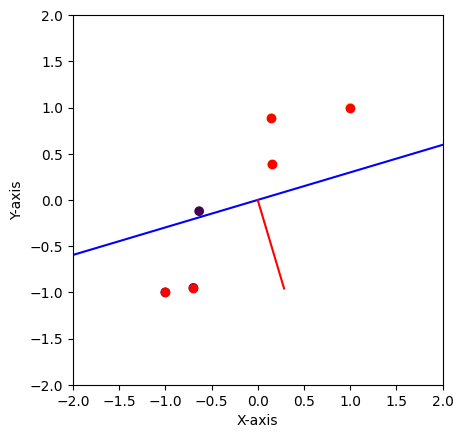

In [479]:
y_pred = predict(all_points, W)
pos = np.where(y - y_pred != 0)[0]
lines = line(W)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(all_points[:, 1], all_points[:, 2], c=labels, cmap='viridis')
ax.scatter(all_points[pos][:, 1], all_points[pos][:, 2], c='r', cmap='viridis')
ax.plot(lines[:, 0], lines[:, 1], c='b')
ax.plot([0, W[1]], [0, W[2]], c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

C:\Users\84866\AppData\Local\Temp\ipykernel_21288\3138663678.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(all_points[rand_pos][1], all_points[rand_pos][2], c='r', cmap='viridis')
C:\Users\84866\AppData\Local\Temp\ipykernel_21288\3138663678.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W[1], W[2], c='g', cmap='viridis')


[[-10.         -47.2043122 ]
 [ 10.          75.45537773]]


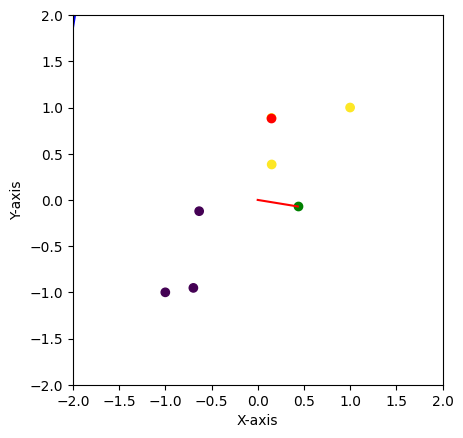

In [480]:
rand_pos = np.random.choice(pos, size = 1)[0]
W = W + all_points[rand_pos]
lines = line(W)
print(lines)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(all_points[:, 1], all_points[:, 2], c=labels, cmap='viridis')
ax.scatter(all_points[rand_pos][1], all_points[rand_pos][2], c='r', cmap='viridis')
ax.scatter(W[1], W[2], c='g', cmap='viridis')
ax.plot(lines[:, 0], lines[:, 1], c='b')
ax.plot([0, W[1]], [0, W[2]], c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

C:\Users\84866\AppData\Local\Temp\ipykernel_21288\3525715120.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(all_points[pos][:, 1], all_points[pos][:, 2], c='r', cmap='viridis')


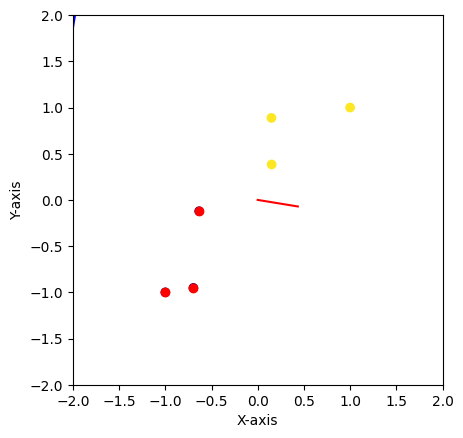

In [481]:
y_pred = predict(all_points, W)
pos = np.where(y - y_pred != 0)[0]
lines = line(W)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.scatter(all_points[:, 1], all_points[:, 2], c=labels, cmap='viridis')
ax.scatter(all_points[pos][:, 1], all_points[pos][:, 2], c='r', cmap='viridis')
ax.plot(lines[:, 0], lines[:, 1], c='b')
ax.plot([0, W[1]], [0, W[2]], c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [482]:
# while True:
#     pred = predict(all_points, W)
#     miss_idx = np.where((y - y_pred) != 0)[0]
#     if miss_idx.shape[0] == 0:
#         break
#     rand_pos = np.random.choice(miss_idx, size = 1)[0]
#     new_W = W + all_points[rand_pos]
